In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline


import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,4]
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

In [2]:
def global_mean_2D(var, weights):
    # assumes 2D field as var input

    # make sure masking is correct, otherwise we get nans
    var = np.ma.masked_invalid(var)
    
    # resulting variable should have dimensions of depth and time (x)
    ave = np.zeros(var.shape[0])

    # loop over time
    for t in np.arange(var.shape[0]):
        ave[t] = np.ma.average(var[t,:,:], weights = weights)
    return ave
#make annual means from monthly timeseries, starting in June

#assumes data starts in january
# assumes data is 2D
def annual_mean_june(var,nyears):
    var_annual = np.zeros((nyears))
    for y in range(0,nyears):
        var_annual[y] = var[(y*12+6):(y*12+18)].mean()
        
    return var_annual

#assumes data starts in january
# assumes data is 2D
# var is time, depth, lat, lon
def annual_mean_june_3D(var,nyears):
    var_annual = np.zeros((nyears,var.shape[1]))
    for y in range(0,nyears):
        var_annual[y,:] = var[(y*12+6):(y*12+18),:].mean(axis = 0)      
    return var_annual
# function to take global weighted mean, keeping depth information
def global_mean_3D(var, weights):
    # make sure masking is correct, otherwise we get nans
    var = np.ma.masked_invalid(var)
    
    # resulting variable should have dimensions of depth and time (x)
    ave = np.zeros([var.shape[0], var.shape[1]])

    # loop over time
    for t in np.arange(var.shape[0]):
    # loop over each depth slice
        for d in np.arange(var.shape[1]):
            ave[t,d] = np.ma.average(var[t,d,:,:], weights = weights)
    return ave

In [3]:
path = '/glade/u/home/chsharri/Work/NW/'

mask = xr.open_dataset('/glade/u/home/chsharri/Work/NW/region_mask_nw.nc')

temp_5 = xr.open_dataset(path+'nw_targets_01.pop.h.TEMP.nc')
temp_27 = xr.open_dataset(path+'nw_targets_02.pop.h.TEMP.nc')
temp_37 = xr.open_dataset(path+'nw_targets_03.pop.h.TEMP.nc')
temp_16 = xr.open_dataset(path+'nw_targets_04.pop.h.TEMP.nc')
temp_47 = xr.open_dataset(path+'nw_targets_05.pop.h.TEMP.nc')
temp_150 = xr.open_dataset(path+'nw_ur_150_07.pop.h.TEMP.nc')

#CONTROLS
temp_cntrl_1 = xr.open_dataset(path+'nw_cntrl_03.pop.h.TEMP.nc') # 25.5 years = 306


In [4]:
temp_cntrl_2 = xr.open_dataset(path+'nw_cntrl_03m02.pop.h.TEMP.nc') # 20 years = 240 mo
temp_cntrl_3 = xr.open_dataset(path+'nw_cntrl_03m03.pop.h.TEMP.nc') # 19 years = 228

In [5]:
temp_cntrl_1.z_t[20].values/100

209.71138671875

In [6]:
dates_com = pd.date_range(start = '01/31/2021', end = '12/31/2034', freq='y')
dates_full = pd.date_range(start = '01/31/2021', end = '12/31/2049', freq='y')
dates_cont = pd.date_range(start = '01/31/2021', end = '12/31/2040', freq='y')

In [7]:
temp_cntrl_1.TEMP

<xarray.DataArray 'TEMP' (time: 306, z_t: 60, nlat: 384, nlon: 320)>
[2256076800 values with dtype=float32]
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 0026-07-01 00:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Potential Temperature
    units:         degC
    grid_loc:      3111
    cell_methods:  time: mean

In [8]:
mean_150_yr = annual_mean_june_3D(global_mean_3D(temp_150.TEMP, mask.TAREA), 30)

mean_control_1_yr = annual_mean_june_3D(global_mean_3D(temp_cntrl_1.TEMP[12*4:,:,:,:], mask.TAREA), 21)

In [9]:
mean_control_2_yr = annual_mean_june_3D(global_mean_3D(temp_cntrl_2.TEMP[12*4:,:,:,:], mask.TAREA), 16)
mean_control_3_yr = annual_mean_june_3D(global_mean_3D(temp_cntrl_3.TEMP[12*4:,:,:,:], mask.TAREA), 15)

In [10]:
mean_control_yr = (mean_control_1_yr[0:15] + mean_control_2_yr[0:15]+mean_control_3_yr[0:15])/3

In [11]:
mean_control_yr.shape

(15, 60)

In [12]:
mean_5_yr = annual_mean_june_3D(global_mean_3D(temp_5.TEMP, mask.TAREA), 15)
mean_27_yr = annual_mean_june_3D(global_mean_3D(temp_27.TEMP, mask.TAREA), 15)
mean_37_yr = annual_mean_june_3D(global_mean_3D(temp_37.TEMP, mask.TAREA), 15)
mean_16_yr = annual_mean_june_3D(global_mean_3D(temp_16.TEMP, mask.TAREA), 15)
mean_47_yr = annual_mean_june_3D(global_mean_3D(temp_47.TEMP, mask.TAREA), 15)

In [13]:
dt_control = np.zeros((mean_control_yr.shape[0]-1, mean_control_yr.shape[1]))
for i in range(0,mean_control_yr.shape[0]-1):
    dt_control[i,:] = (mean_control_yr[i+1][:] - mean_control_yr[i][:])/((i+1)-i)

dt_control_1 = np.zeros((mean_control_1_yr.shape[0]-1, mean_control_1_yr.shape[1]))
for i in range(0,mean_control_1_yr.shape[0]-1):
    dt_control_1[i,:] = (mean_control_1_yr[i+1][:] - mean_control_1_yr[i][:])/((i+1)-i)
    
dt_control_2 = np.zeros((mean_control_2_yr.shape[0]-1, mean_control_2_yr.shape[1]))
for i in range(0,mean_control_2_yr.shape[0]-1):
    dt_control_2[i,:] = (mean_control_2_yr[i+1][:] - mean_control_2_yr[i][:])/((i+1)-i)
    
dt_control_3 = np.zeros((mean_control_3_yr.shape[0]-1, mean_control_3_yr.shape[1]))
for i in range(0,mean_control_3_yr.shape[0]-1):
    dt_control_3[i,:] = (mean_control_2_yr[i+1][:] - mean_control_3_yr[i][:])/((i+1)-i)
    
dt_150 = np.zeros((mean_150_yr.shape[0]-1, mean_150_yr.shape[1]))
for i in range(0,mean_150_yr.shape[0]-1):
    dt_150[i,:] = (mean_150_yr[i+1][:] - mean_150_yr[i][:])/((i+1)-i)
    
dt_5 = np.zeros((mean_5_yr.shape[0]-1, mean_5_yr.shape[1]))
dt_27 = np.zeros((mean_27_yr.shape[0]-1, mean_27_yr.shape[1]))
dt_37 = np.zeros((mean_37_yr.shape[0]-1, mean_37_yr.shape[1]))
dt_16 = np.zeros((mean_16_yr.shape[0]-1, mean_16_yr.shape[1]))
dt_47 = np.zeros((mean_47_yr.shape[0]-1, mean_47_yr.shape[1]))

for i in range(0,mean_5_yr.shape[0]-1):
    dt_5[i,:] = (mean_5_yr[i+1][:] - mean_5_yr[i][:])/((i+1)-i)  
    dt_27[i,:] = (mean_27_yr[i+1][:] - mean_27_yr[i][:])/((i+1)-i)  
    dt_37[i,:] = (mean_37_yr[i+1][:] - mean_37_yr[i][:])/((i+1)-i)  
    dt_16[i,:] = (mean_16_yr[i+1][:] - mean_16_yr[i][:])/((i+1)-i)  
    dt_47[i,:] = (mean_47_yr[i+1][:] - mean_47_yr[i][:])/((i+1)-i)  

In [14]:
dt_control.shape

(14, 60)

In [15]:
dT150tg_over_dt = np.mean(dt_150[-10:,:], axis = 0)
#dTcontrol_over_dt = np.mean(dt_control[-20:,:], axis = 0)
dTcontrol_over_dt = np.mean(dt_control[-10:,:], axis = 0)

In [16]:
dTcontrol_over_dt.mean()

-0.005019980288214157

In [17]:
dT150tg_over_dt[10]

0.028333870569865027

In [18]:
len(dt_control_3[:,10])

14

In [19]:
dates_com

DatetimeIndex(['2021-12-31', '2022-12-31', '2023-12-31', '2024-12-31',
               '2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31',
               '2029-12-31', '2030-12-31', '2031-12-31', '2032-12-31',
               '2033-12-31', '2034-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [20]:
dates_cont[0]

Timestamp('2021-12-31 00:00:00', freq='A-DEC')

In [21]:
dt_control_1[0,10]

0.021453301111856504

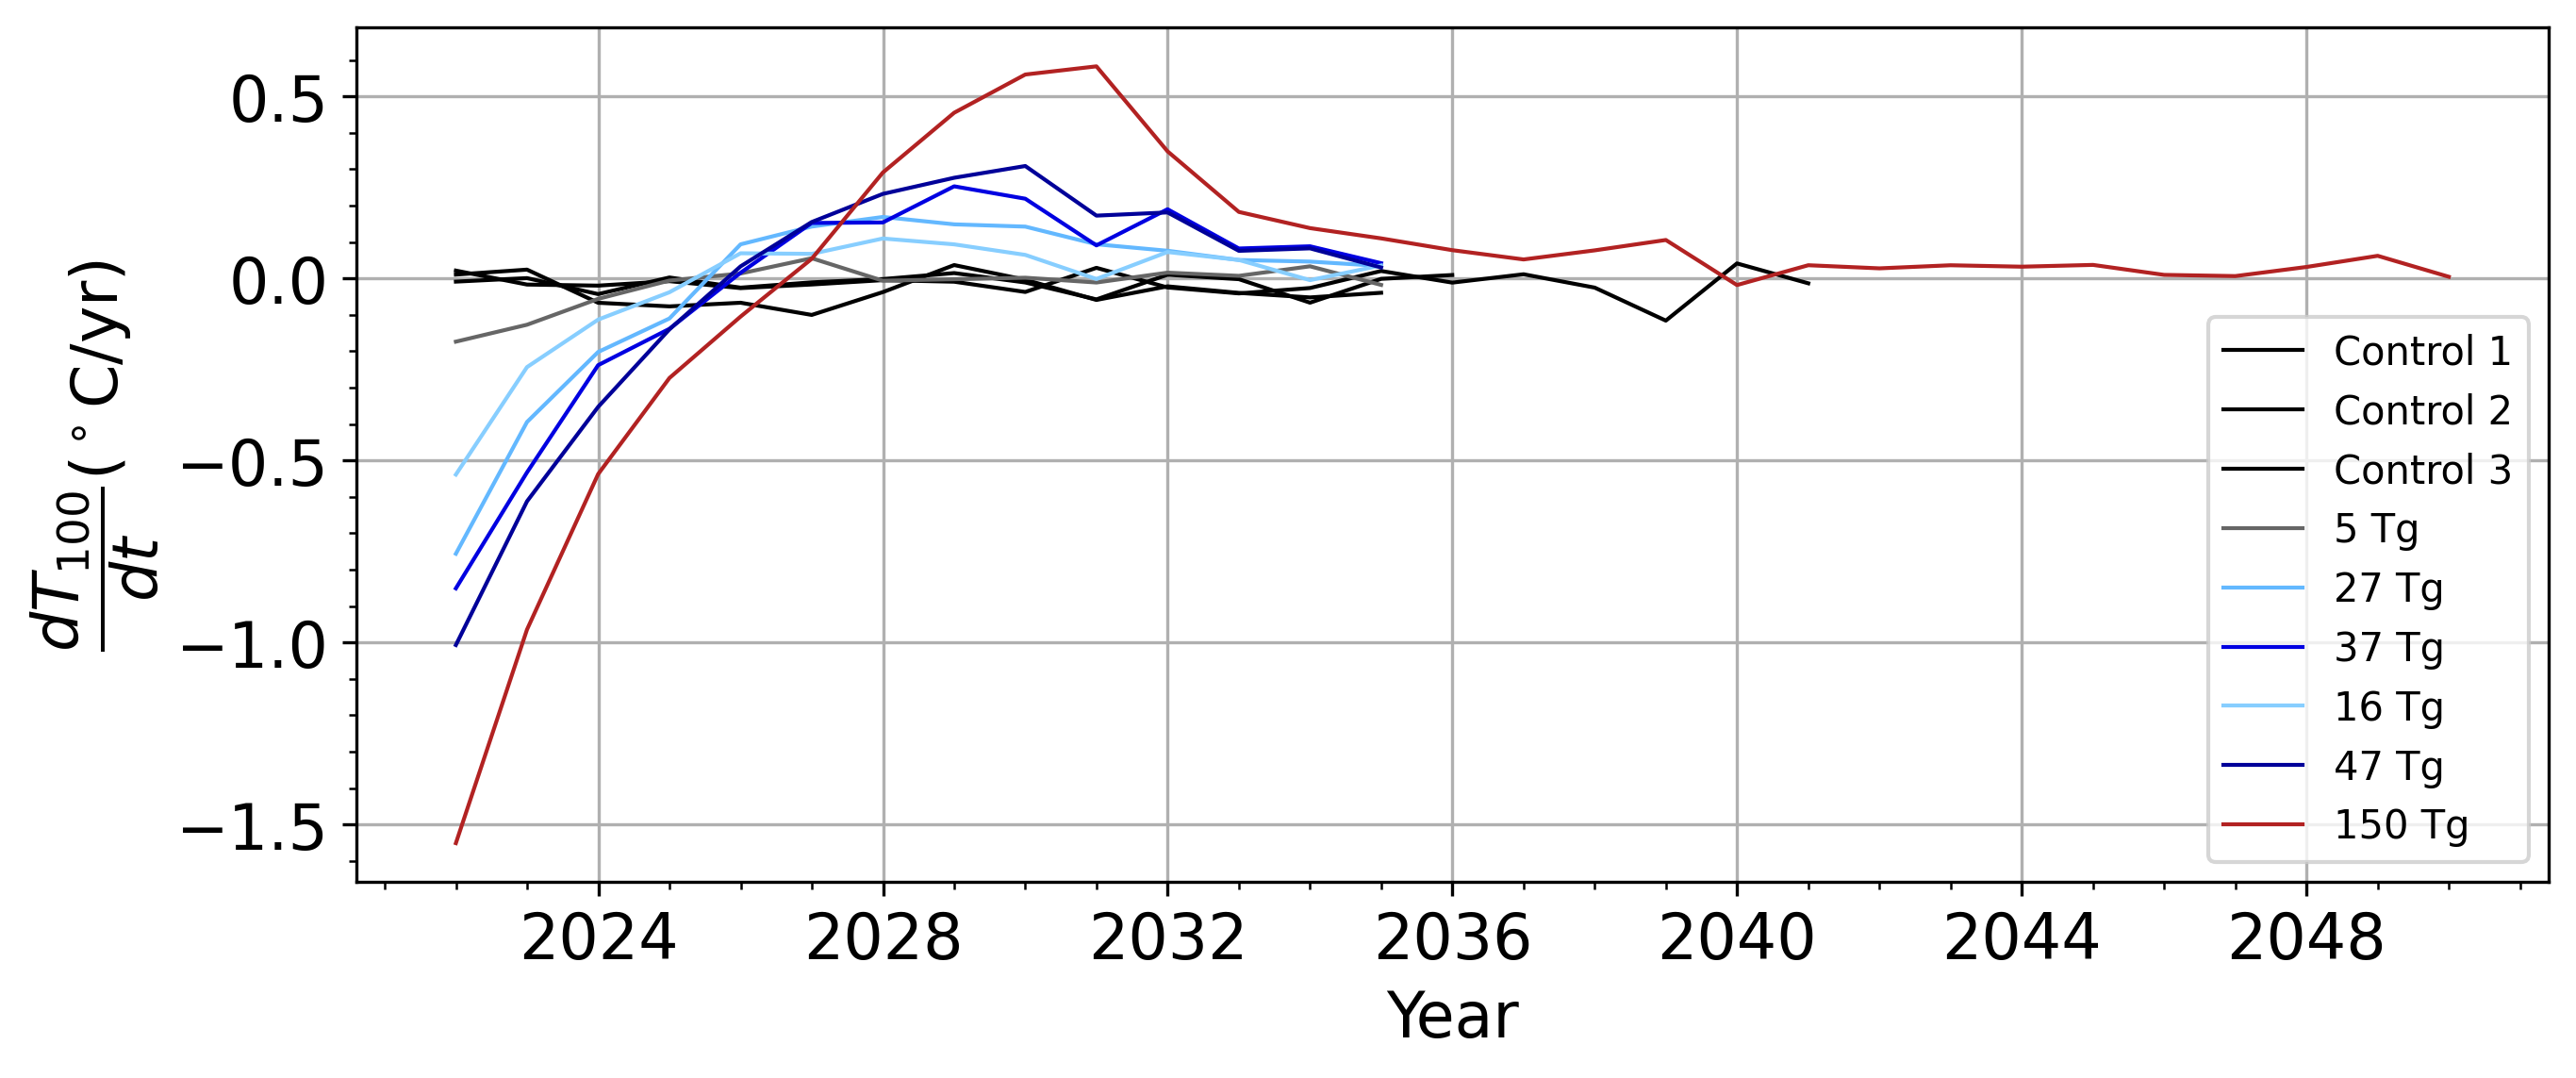

In [22]:
fig= plt.figure(figsize=(10,4), facecolor='w')


plt.grid()
plt.minorticks_on()

plt.plot(dates_cont[0:21],dt_control_1[0:,10],color = 'k', linewidth = 1, label = 'Control 1')
plt.plot(dates_cont[0:15],dt_control_2[0:,10],color = 'k', linewidth = 1, label = 'Control 2')
plt.plot(dates_cont[0:14],dt_control_3[0:,10],color = 'k', linewidth = 1, label = 'Control 3')

plt.plot(dates_com[0:],dt_5[0:,10],color = '#666666', linewidth = 1, label = '5 Tg')
plt.plot(dates_com[0:],dt_27[0:,10],color = '#63b8ff', linewidth = 1, label = '27 Tg')
plt.plot(dates_com[0:],dt_37[0:,10],color = '#0000e1', linewidth = 1, label = '37 Tg')
plt.plot(dates_com[0:],dt_16[0:,10],color = '#87ceff', linewidth = 1, label = '16 Tg')
plt.plot(dates_com[0:],dt_47[0:,10],color = '#000099', linewidth = 1, label = '47 Tg')
plt.plot(dates_full[0:],dt_150[0:,10],color = '#b22222', linewidth = 1, label = '150 Tg')

plt.legend( loc='lower right',fontsize = '10')

#plt.xlim([2021,2040])

#plt.axhline(y=0, color='grey', linestyle='--',linewidth = 1.1)

plt.xlabel('Year')
plt.ylabel('$\dfrac{dT_{100}}{dt}$($^\circ$C/yr)')

 #plt.ylabel('$\dfrac{NO3}{dt}$($mmol/m^3$)')

plt.show()

fig.savefig('/glade/work/vgarza/nw_figures/dT100_dt.jpg' , bbox_inches='tight')

In [24]:
dDeltaT_over_dt = dT150tg_over_dt - dTcontrol_over_dt

Text(0, 0.5, '$\\dfrac{dT}{dt}$($^\\circ$C/yr)')

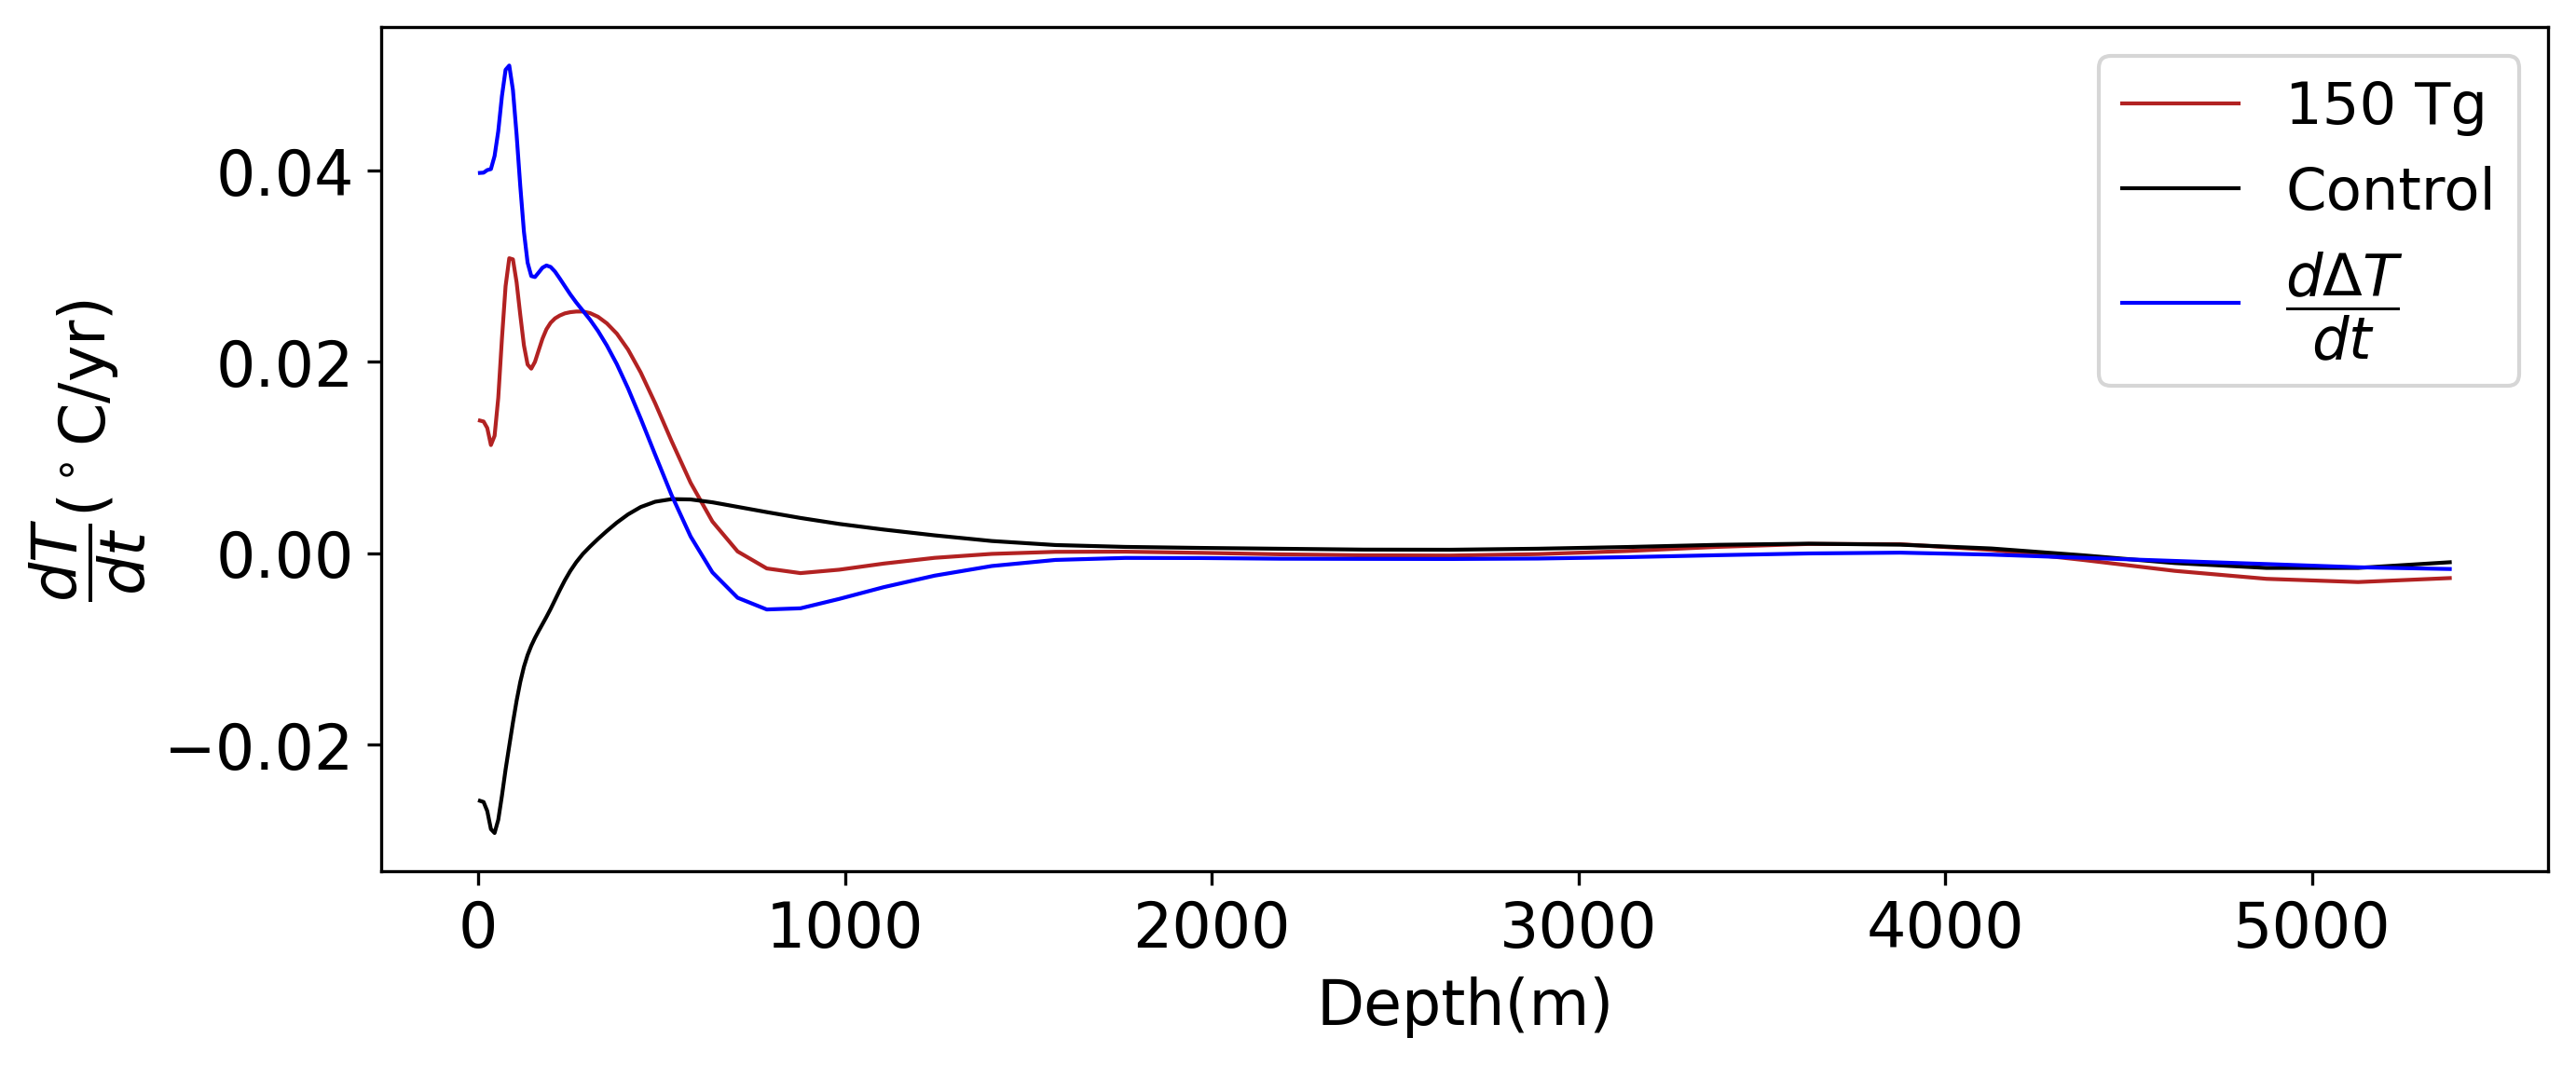

In [25]:
fig= plt.figure(figsize=(10,4), facecolor='w')

plt.plot(temp_cntrl_1.z_t/100, dT150tg_over_dt,color = '#b22222', linewidth = 1,label = '150 Tg')
plt.plot(temp_cntrl_1.z_t/100, dTcontrol_over_dt,color = 'k', linewidth = 1, label = 'Control')

plt.plot(temp_cntrl_1.z_t/100,dDeltaT_over_dt,color='blue',linewidth=1,label = '$\dfrac{d\u0394T}{dt}$')


plt.legend(loc = 'upper right', fontsize = 15)
plt.xlabel('Depth(m)')
plt.ylabel('$\dfrac{dT}{dt}$($^\circ$C/yr)')

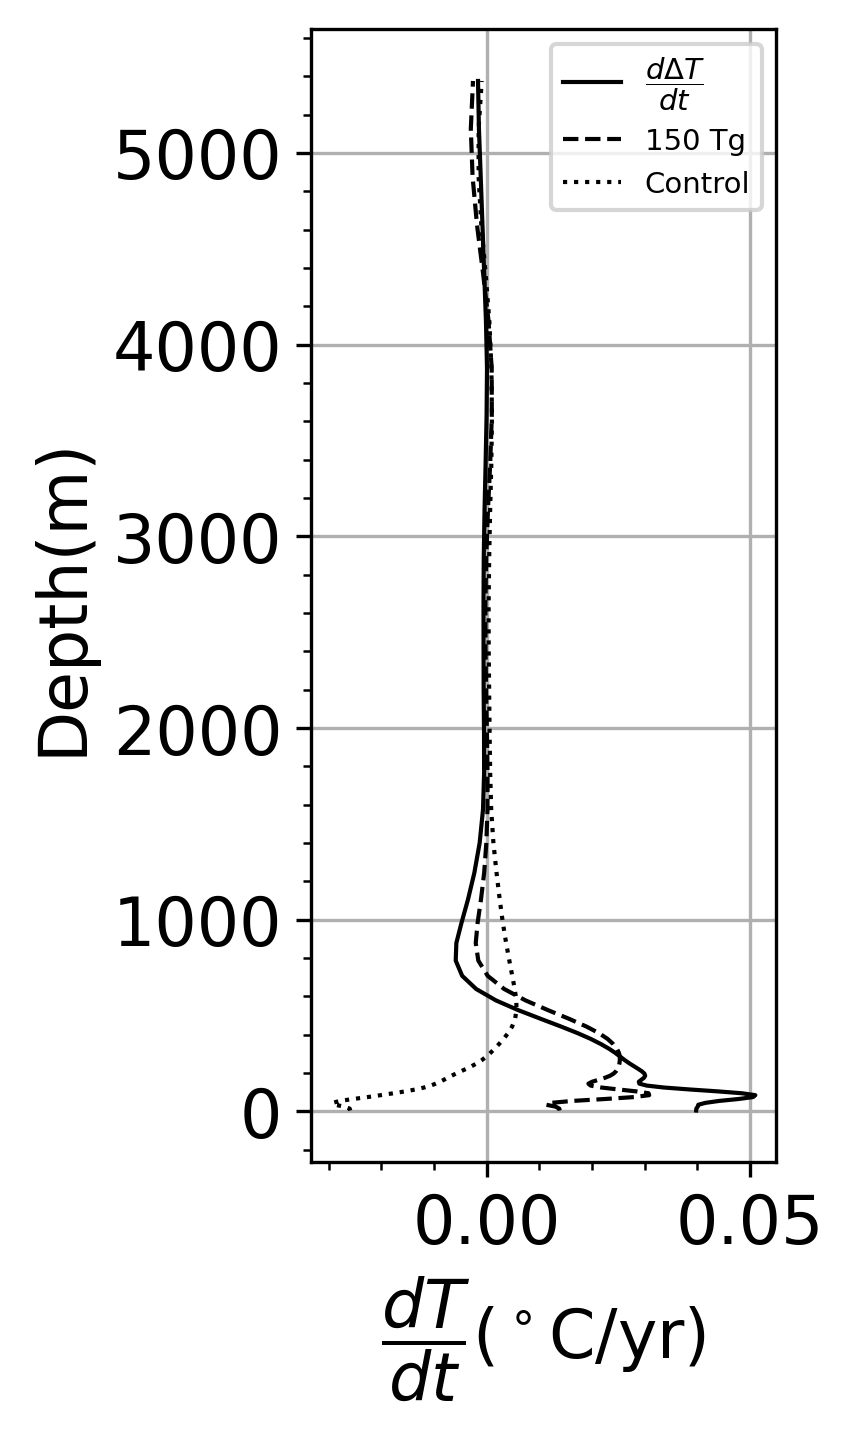

In [26]:
fig= plt.figure(figsize=(2,5), facecolor='w')

plt.grid()
plt.minorticks_on()


plt.plot(dDeltaT_over_dt,1*temp_cntrl_1.z_t/100,color='k',linewidth=1,label = '$\dfrac{d\u0394T}{dt}$') #black,
    #list it first
plt.plot( dT150tg_over_dt,1*temp_cntrl_1.z_t/100,'--',color =  'k', linewidth = 1,label = '150 Tg')#dashed
plt.plot( dTcontrol_over_dt,1*temp_cntrl_1.z_t/100,':',color = 'k', linewidth = 1, label = 'Control')#dotted


        #add the other control runs here
plt.legend(loc = 'best')
plt.ylabel('Depth(m)')
plt.xlabel('$\dfrac{dT}{dt}$($^\circ$C/yr)')

plt.legend( loc='best',fontsize = '7')#, scatterpoints=1)

#fig.savefig('/glade/work/vgarza/nw_figures/dT_dt.jpg' , bbox_inches='tight')

Text(0, 0.5, '$\\dfrac{dT_{control}}{dt}$')

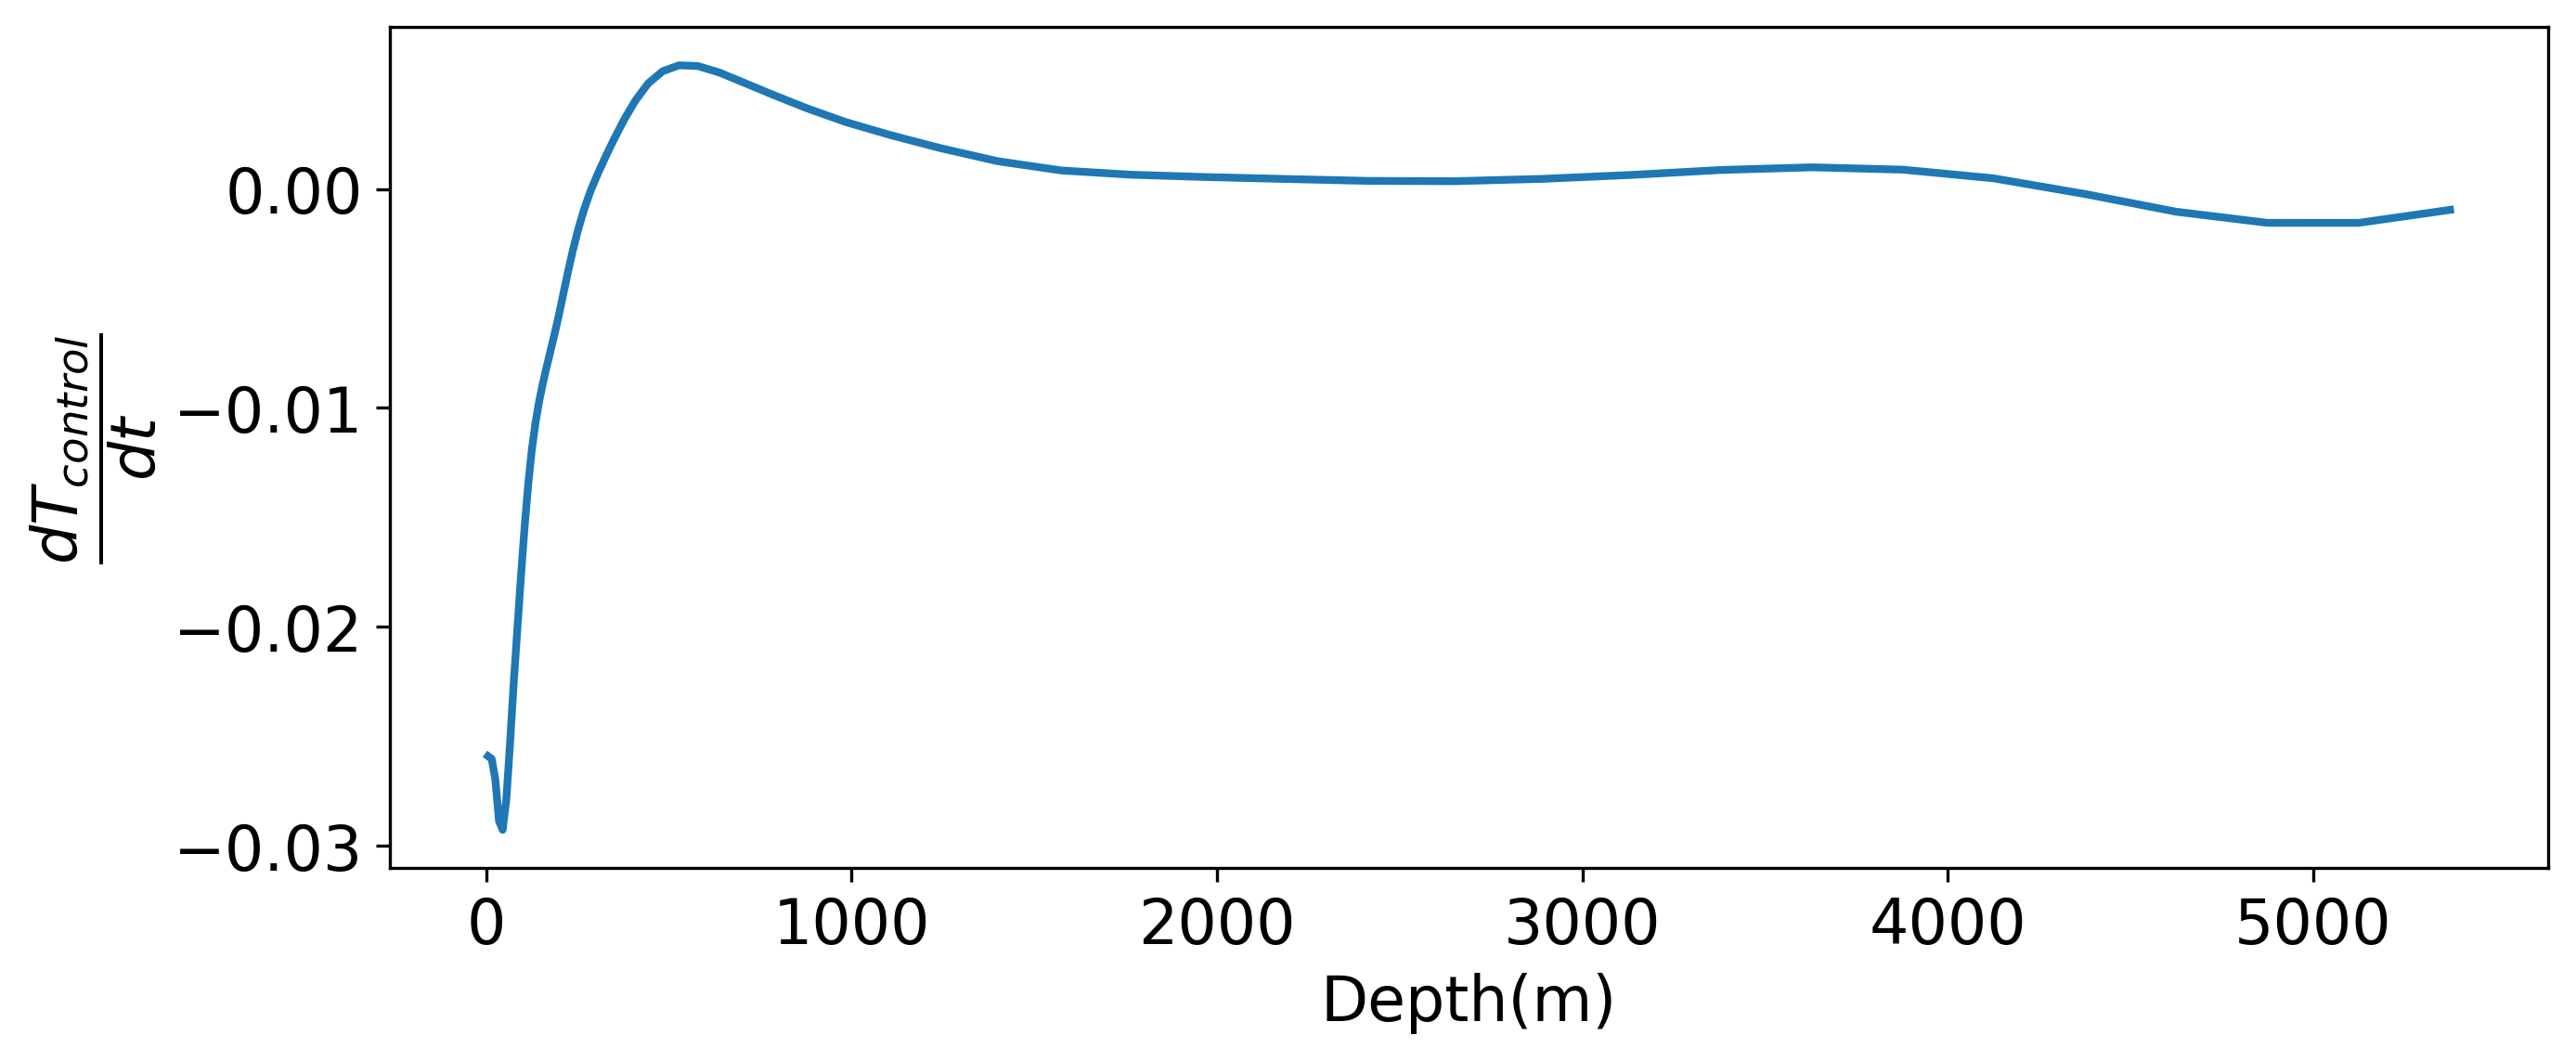

In [27]:
fig= plt.figure(figsize=(10,4), facecolor='w')
plt.plot(temp_cntrl_1.z_t/100, dTcontrol_over_dt)


plt.xlabel('Depth(m)')
plt.ylabel('$\dfrac{dT_{control}}{dt}$')#($^\circ$C/yr)')

In [28]:
dTcontrol_over_dt

array([-2.59074370e-02, -2.60326333e-02, -2.69780848e-02, -2.88705879e-02,
       -2.92731391e-02, -2.78968970e-02, -2.53805637e-02, -2.26295047e-02,
       -2.01560471e-02, -1.77168475e-02, -1.54467238e-02, -1.34796407e-02,
       -1.18834310e-02, -1.06587119e-02, -9.68834294e-03, -8.87674226e-03,
       -8.14522107e-03, -7.42787520e-03, -6.67403539e-03, -5.84409237e-03,
       -4.89413208e-03, -3.88166904e-03, -2.85112328e-03, -1.86247031e-03,
       -9.44116380e-04, -8.96930695e-05,  6.86457422e-04,  1.48572657e-03,
        2.31868691e-03,  3.19398774e-03,  4.05339400e-03,  4.82694573e-03,
        5.37940396e-03,  5.65246211e-03,  5.61856031e-03,  5.31836351e-03,
        4.84291183e-03,  4.29183907e-03,  3.68179613e-03,  3.05604802e-03,
        2.46494412e-03,  1.86282198e-03,  1.26982596e-03,  8.48831071e-04,
        6.54503372e-04,  5.48215707e-04,  4.60639927e-04,  3.72222066e-04,
        3.57915627e-04,  4.63950634e-04,  6.43751356e-04,  8.70998700e-04,
        9.92258390e-04,  

Text(0, 0.5, '$\\dfrac{dΔT}{dt}$($^\\circ$C/yr)')

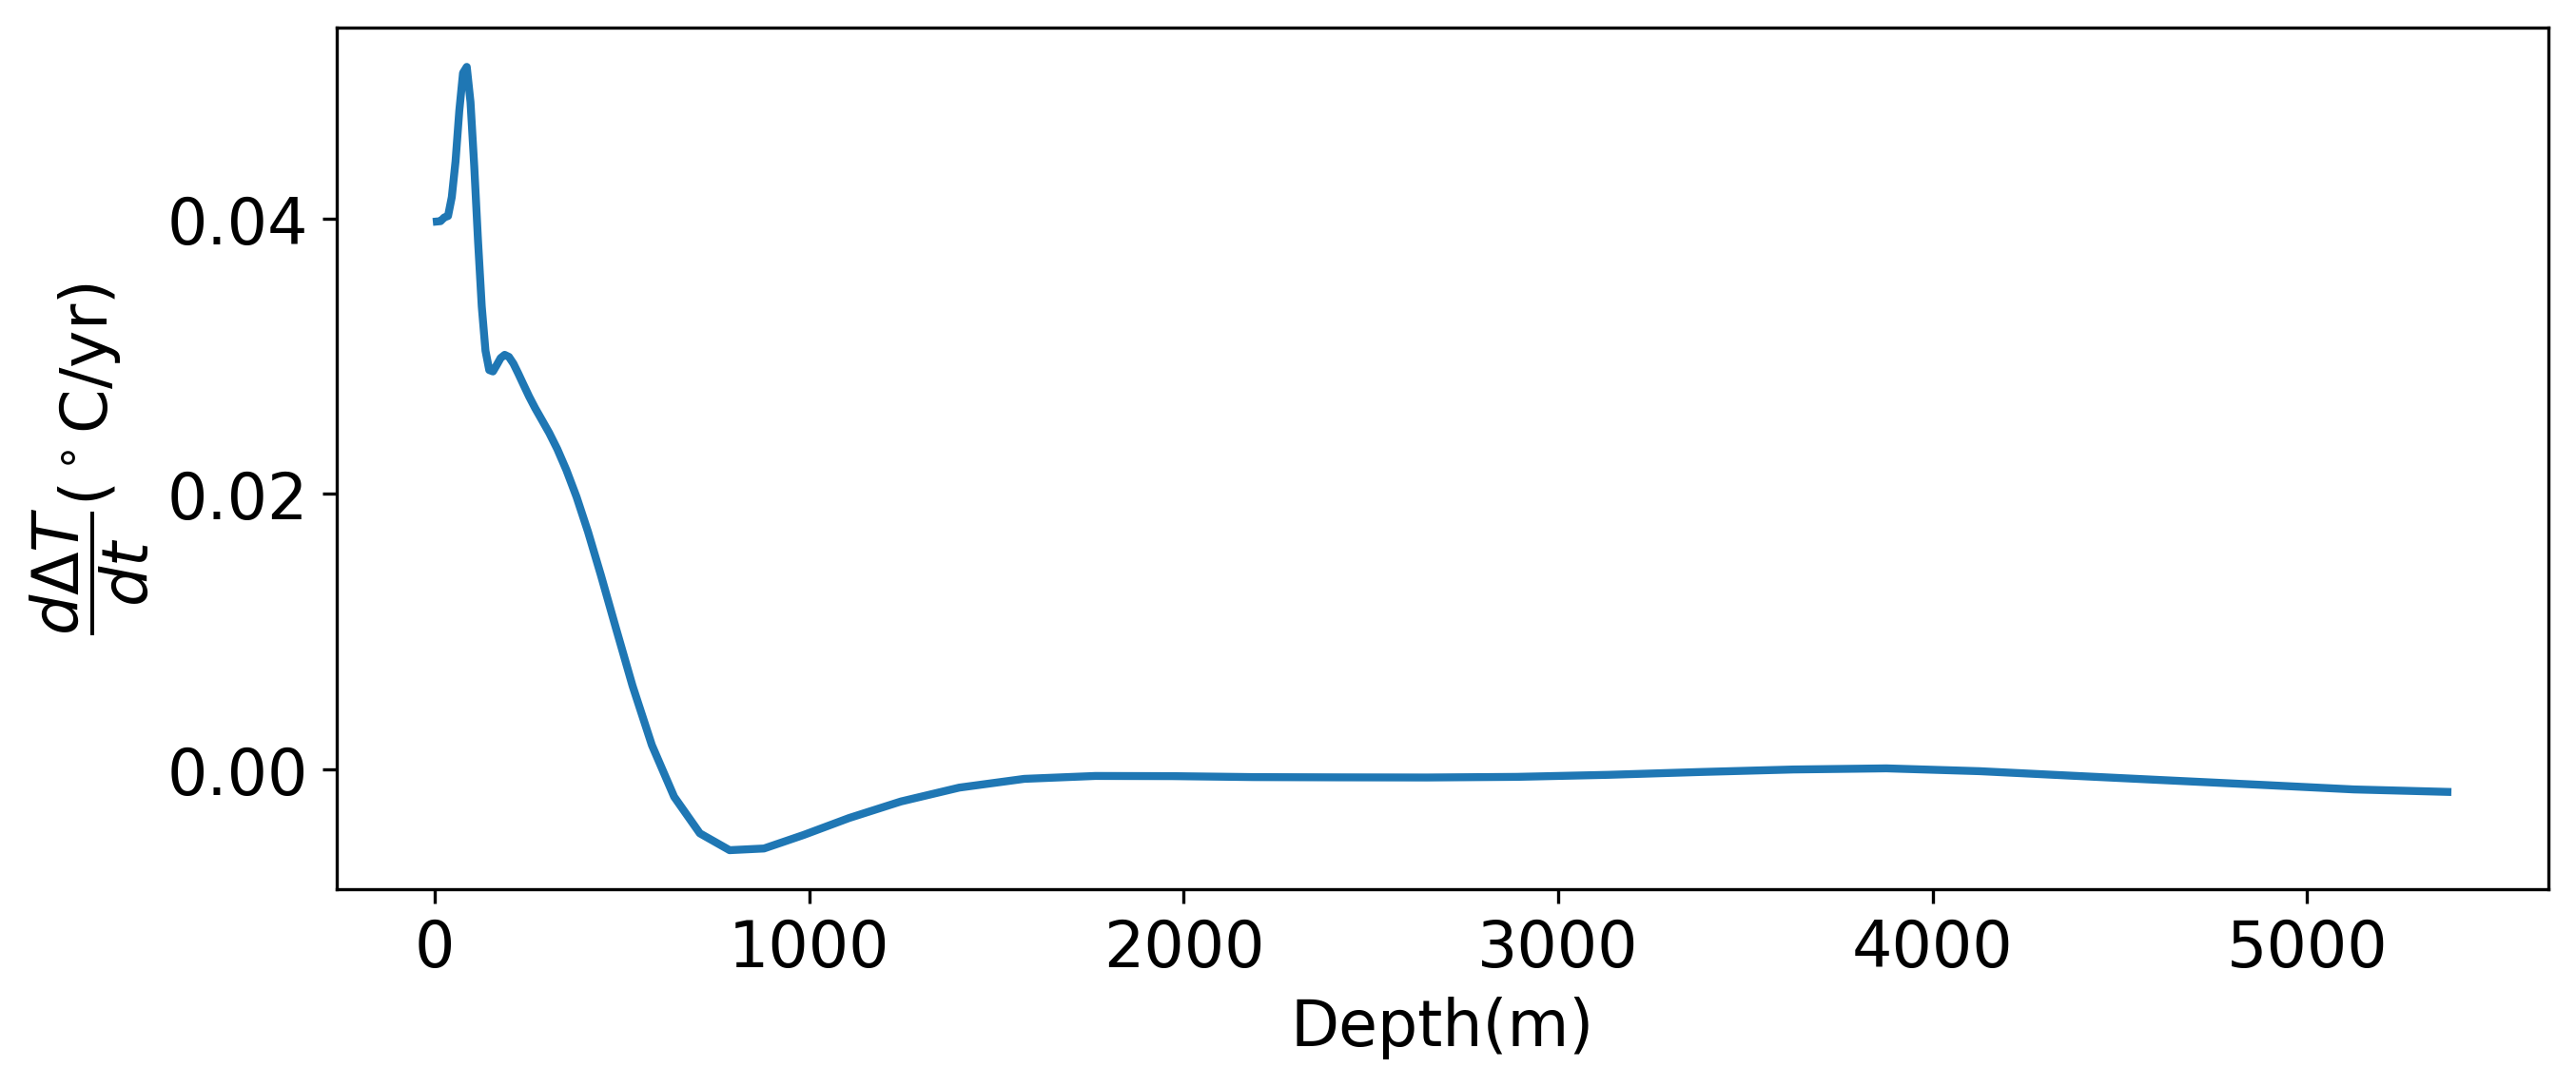

In [29]:
fig= plt.figure(figsize=(10,4), facecolor='w')
plt.plot(temp_cntrl_1.z_t/100,dDeltaT_over_dt)

plt.xlabel('Depth(m)')
plt.ylabel('$\dfrac{d\u0394T}{dt}$($^\circ$C/yr)')

In [30]:
dates_com[-10:]

DatetimeIndex(['2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31',
               '2029-12-31', '2030-12-31', '2031-12-31', '2032-12-31',
               '2033-12-31', '2034-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [31]:
dates_full[4:14]

DatetimeIndex(['2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31',
               '2029-12-31', '2030-12-31', '2031-12-31', '2032-12-31',
               '2033-12-31', '2034-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [32]:
deltaTf = np.mean(mean_150_yr[4:14,:],axis=0) - np.mean(mean_control_yr[-10:,:],axis=0)

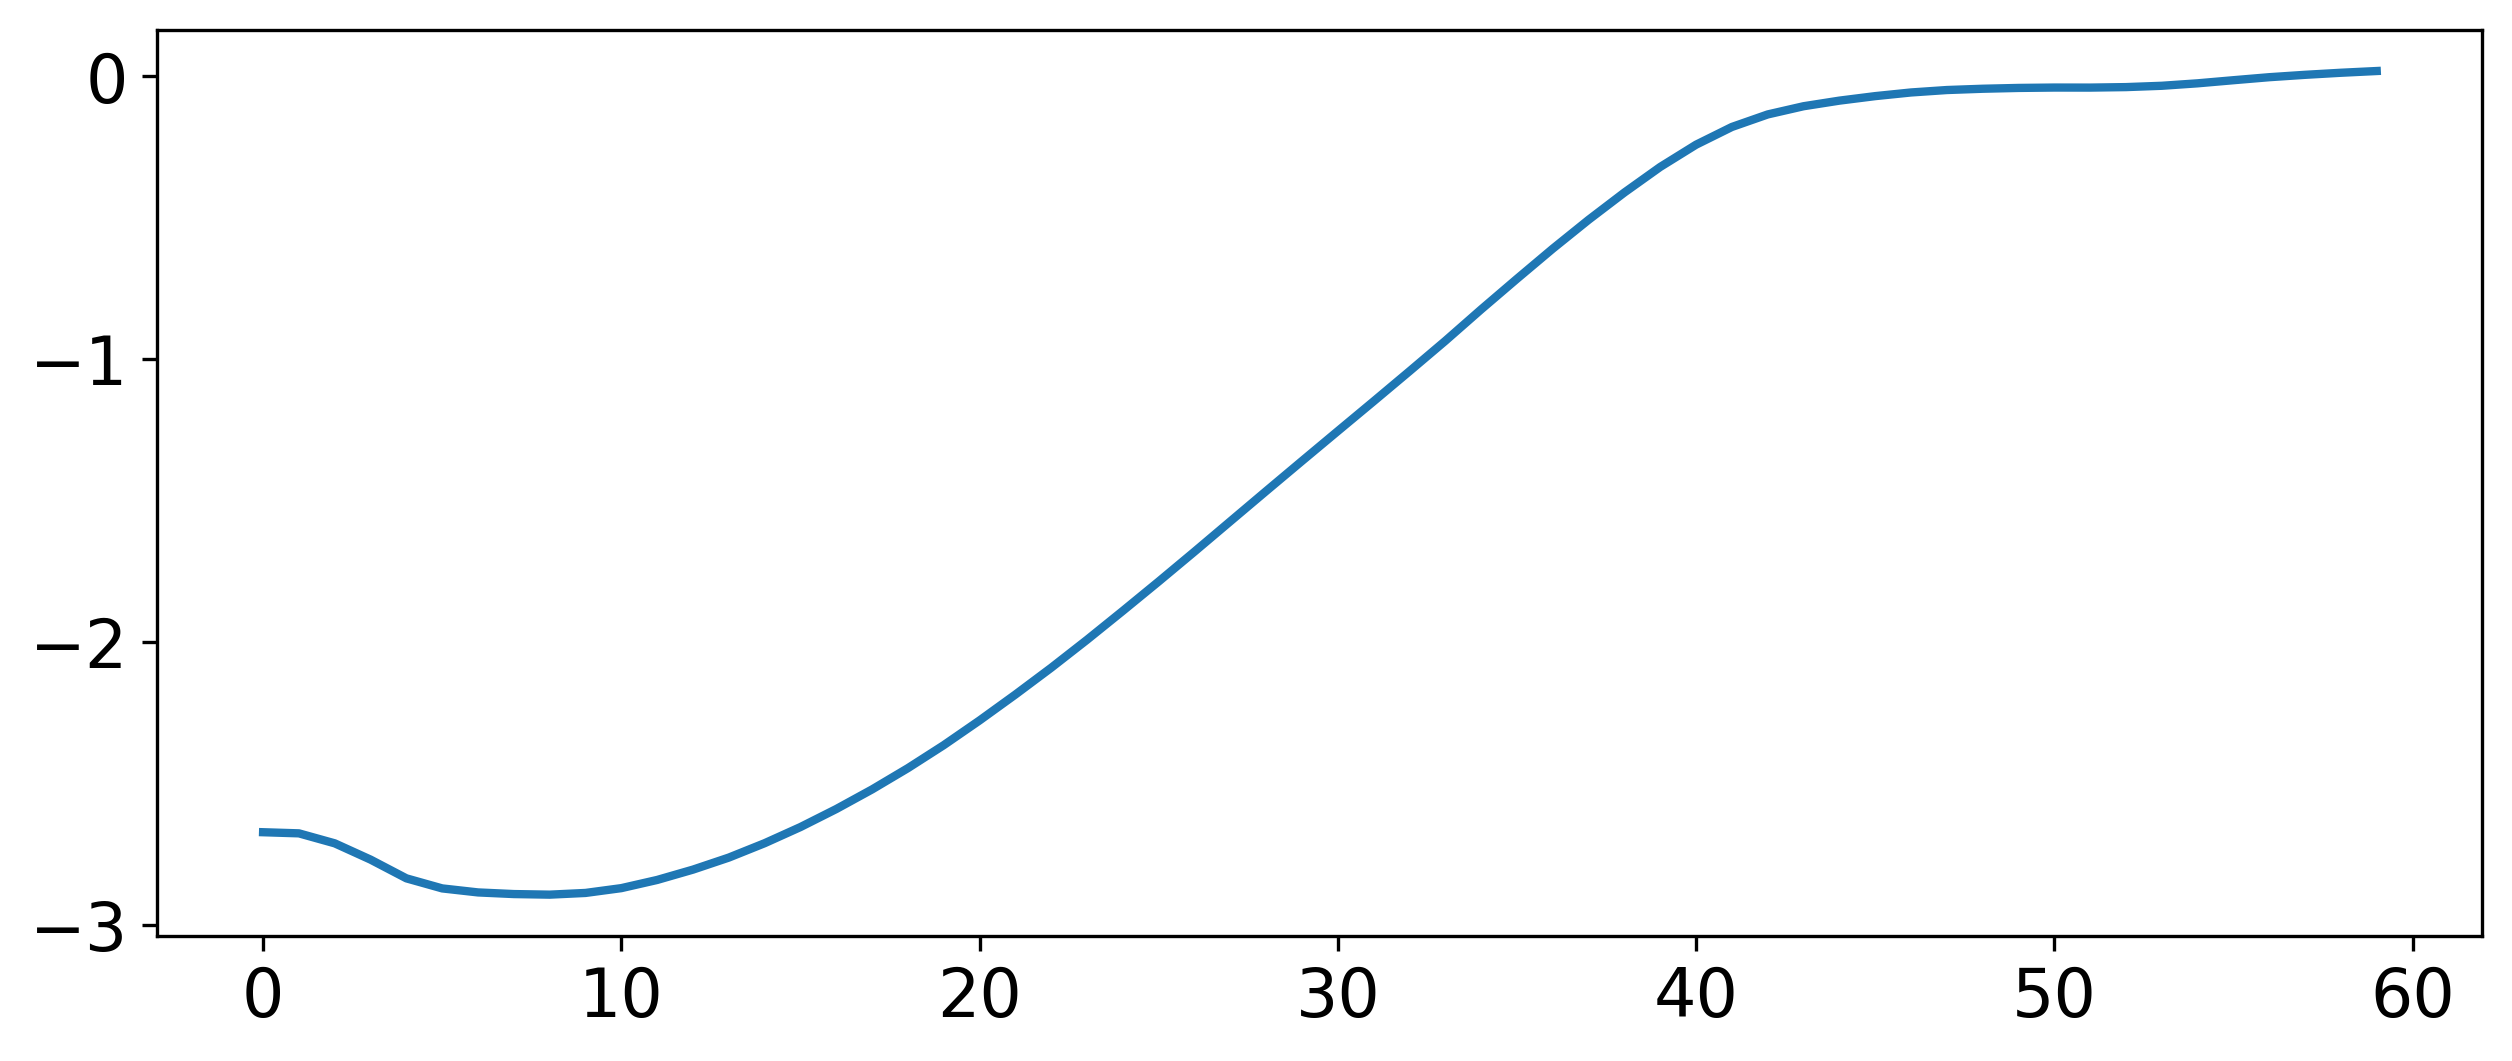

In [33]:
plt.plot(deltaTf)

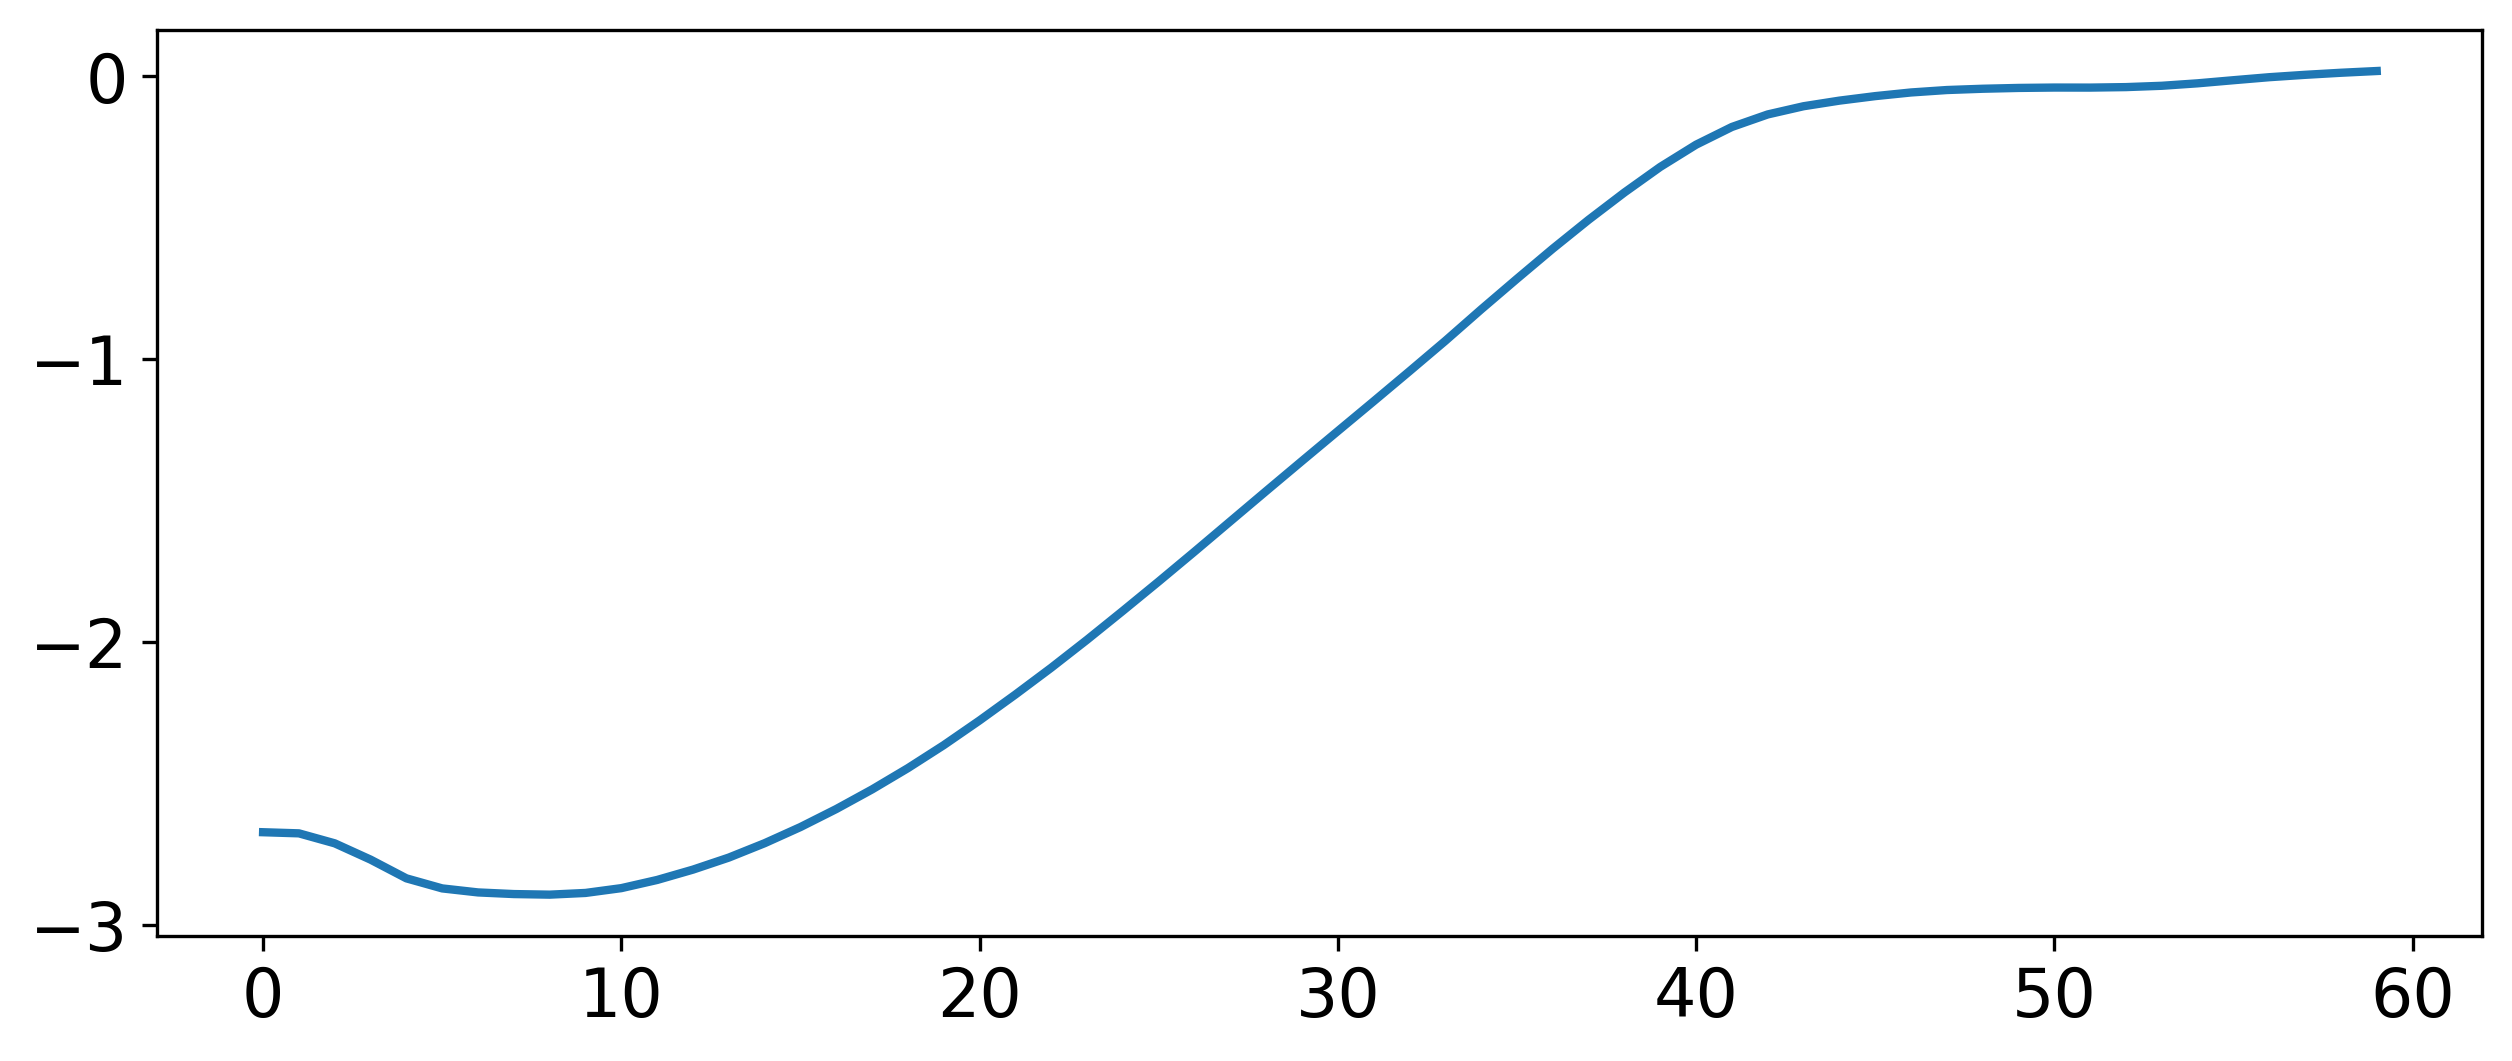

In [34]:
plt.plot(deltaTf) #25-30

In [35]:
dDeltaT_over_dt

array([ 3.97769451e-02,  3.98036904e-02,  4.00734160e-02,  4.01784791e-02,
        4.15486442e-02,  4.41412449e-02,  4.78102048e-02,  5.05690548e-02,
        5.10086589e-02,  4.84525071e-02,  4.37805944e-02,  3.84109603e-02,
        3.36198462e-02,  3.03896056e-02,  2.89882633e-02,  2.88849884e-02,
        2.93538888e-02,  2.98579216e-02,  3.00923189e-02,  2.99423536e-02,
        2.94520722e-02,  2.87378867e-02,  2.79334174e-02,  2.70712455e-02,
        2.62192514e-02,  2.53693183e-02,  2.44272444e-02,  2.32443200e-02,
        2.17194094e-02,  1.97698500e-02,  1.72434767e-02,  1.40724672e-02,
        1.03018867e-02,  6.05240795e-03,  1.74379746e-03, -2.01131503e-03,
       -4.66737615e-03, -5.89187808e-03, -5.76956802e-03, -4.78632715e-03,
       -3.55407397e-03, -2.35367417e-03, -1.34550002e-03, -7.09789329e-04,
       -4.99777661e-04, -5.12405237e-04, -5.82649642e-04, -6.00457191e-04,
       -6.11077415e-04, -5.65627217e-04, -4.18418977e-04, -2.13065743e-04,
       -3.00884247e-05,  

In [36]:
tr = abs(deltaTf)/dDeltaT_over_dt

In [37]:
tr.min()

-1254.7536428059009

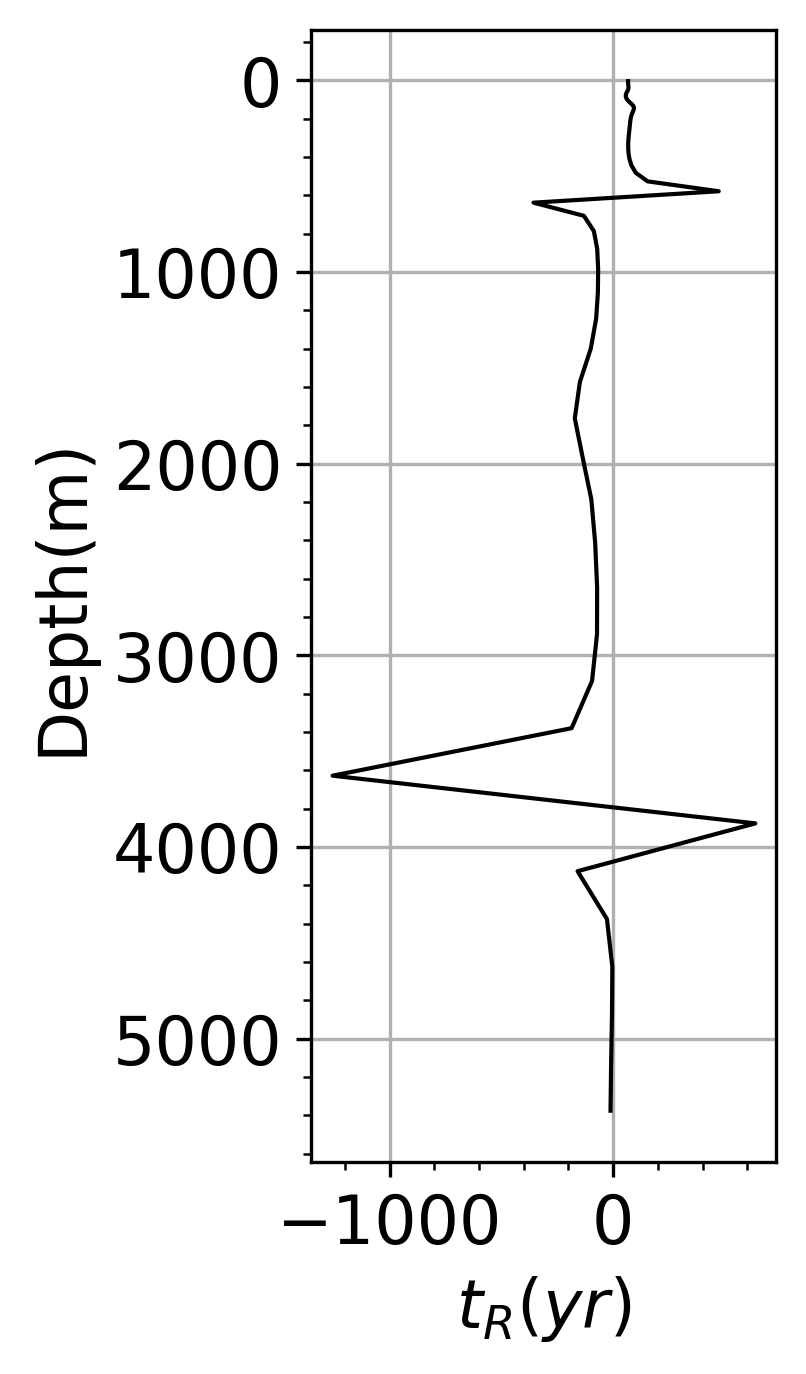

In [38]:
fig= plt.figure(figsize=(2,5), facecolor='w')

plt.grid()
plt.minorticks_on()

plt.plot((tr),temp_cntrl_1.z_t/100,color='k',linewidth=1,label = '$\dfrac{d\u0394T}{dt}$') #black,

plt.ylabel('Depth(m)')
plt.xlabel('$t_{R}(yr)$')

plt.gca().invert_yaxis()

fig.savefig('/glade/work/vgarza/nw_figures/T_r-vertical no negative y.jpg' , bbox_inches='tight')

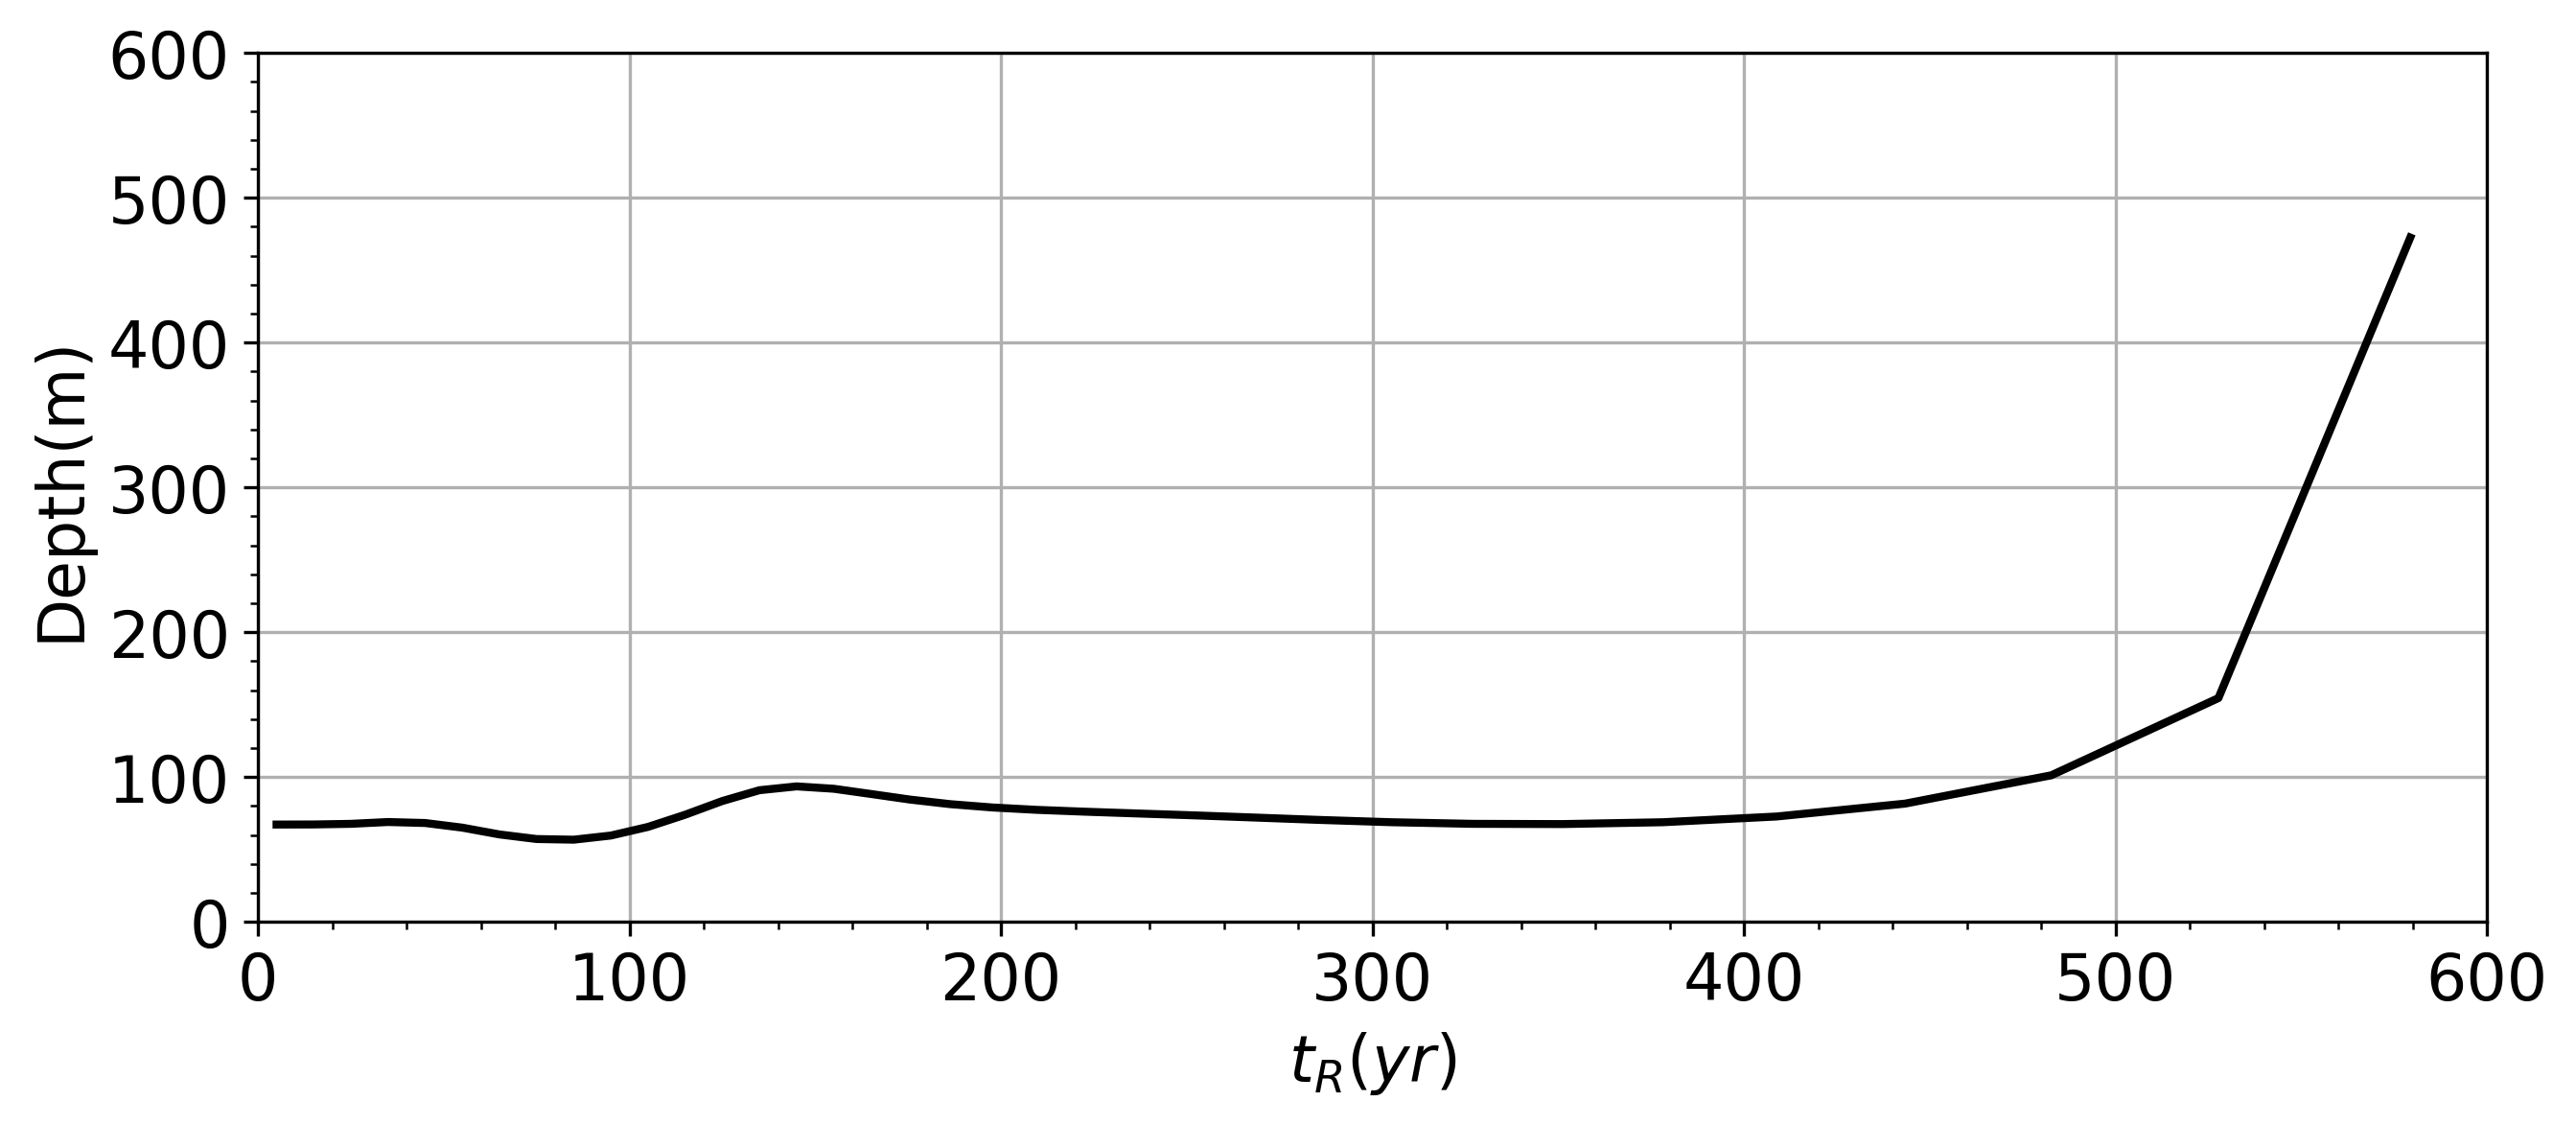

In [39]:
fig= plt.figure(figsize=(10,4), facecolor='w')
plt.plot(temp_cntrl_1.z_t[0:35]/100,(tr[0:35]), color = 'k')
plt.ylim([0,600])
plt.xlim([0,600])
plt.ylabel('Depth(m)')
plt.xlabel('$t_{R}(yr)$')

plt.grid()
plt.minorticks_on()

#fig.savefig('/glade/work/vgarza/nw_figures/T_r-600x600.jpg' , bbox_inches='tight')

In [40]:
tr[10]

65.55867996246774

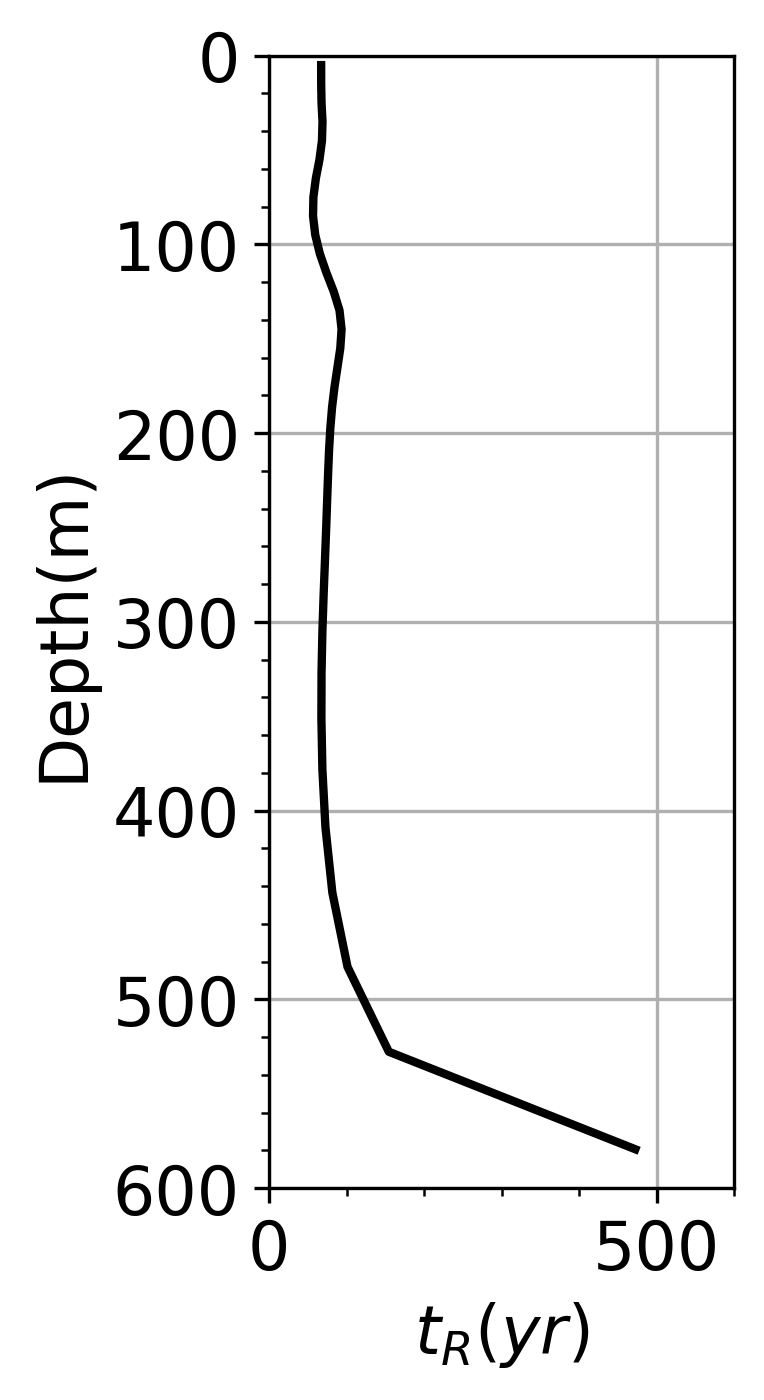

In [43]:
fig= plt.figure(figsize=(2,5), facecolor='w')
plt.plot((tr[0:35]),temp_cntrl_1.z_t[0:35]/100, color = 'k')
plt.ylim([0,600])
plt.xlim([0,600])
plt.ylabel('Depth(m)')
plt.xlabel('$t_{R}(yr)$')

plt.gca().invert_yaxis()

plt.grid()
plt.minorticks_on()



fig.savefig('/glade/work/vgarza/nw_figures/T_r-600x600-vertical no negative.jpg' , bbox_inches='tight')